In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tqdm import tqdm
from google.colab import files

tqdm.pandas()

In [3]:
train_embedding_path = "/content/drive/MyDrive/DatasetHLT/VV1/dataset_train_embeddings.csv"
test_embedding_path = "/content/drive/MyDrive/DatasetHLT/VV1/dataset_test_embeddings.csv"

In [4]:
df_train_embedding = pd.read_csv(train_embedding_path)
df_test_embedding = pd.read_csv(test_embedding_path)

df_train_embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Rating
0,0.032744,-0.167068,-0.132975,0.075244,-0.198651,0.208142,0.002468,0.270798,-0.120857,-0.106908,...,0.291426,0.058430,-0.135445,0.024991,-0.188266,0.111339,0.197360,-0.011223,0.000850,3
1,-0.068530,-0.108432,-0.102551,0.070308,-0.250629,0.296236,-0.087271,0.201177,-0.021955,-0.193456,...,0.334755,0.071870,-0.151875,0.033964,-0.094901,-0.029402,0.137434,-0.049568,-0.071807,2
2,0.018762,-0.075240,-0.132597,0.103171,-0.220575,0.225282,-0.100401,0.250748,0.005776,-0.115201,...,0.375004,0.073134,-0.136006,-0.080166,-0.066207,0.078535,-0.048979,-0.080606,0.104231,2
3,0.050064,-0.191098,-0.184570,-0.058151,-0.008091,0.148178,-0.009033,0.328290,0.004737,-0.118565,...,0.292313,0.041558,-0.289444,0.037820,-0.258467,0.050480,0.179357,0.070320,-0.040795,5
4,-0.030280,-0.072091,-0.202702,-0.001446,-0.302075,0.271846,0.063018,0.250574,-0.123610,-0.141482,...,0.489194,0.140571,-0.126699,-0.037076,-0.051469,0.086871,0.223359,-0.043732,-0.112464,2
5,0.035856,-0.089244,-0.171737,-0.050711,-0.183741,0.217000,-0.028255,0.267373,-0.026556,-0.135691,...,0.293916,0.042711,-0.214499,0.128606,-0.240037,0.062883,0.189831,0.000212,-0.025405,1
6,0.011041,-0.304941,-0.148165,0.003653,-0.161745,0.273706,0.051519,0.087785,-0.047732,-0.110190,...,0.299678,0.124783,-0.172803,0.036975,-0.279777,-0.023686,0.121117,-0.046196,-0.132680,2
7,0.052525,-0.142567,-0.216845,-0.011428,-0.140339,0.195476,-0.027503,0.211093,-0.018501,-0.128718,...,0.191496,0.054312,-0.261234,0.041440,-0.254013,0.071060,0.097485,0.099264,-0.032948,4
8,0.079116,-0.107149,-0.195688,0.034660,-0.295246,0.407544,-0.098984,0.205681,-0.050687,-0.259537,...,0.469020,0.004460,-0.179824,-0.066219,-0.123551,0.076905,0.123880,-0.059192,-0.082861,1
9,0.043415,-0.126235,-0.030452,0.028289,-0.229290,0.166494,-0.036465,0.209879,-0.185275,-0.147674,...,0.348739,0.022823,-0.238766,-0.001819,-0.323182,0.073428,0.334504,0.172392,0.036460,5


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df_train = df_train_embedding.copy()
df_test = df_test_embedding.copy()

In [7]:
# ✅ 3. Dividi features e target
X_train = df_train.drop('Rating', axis=1).values
y_train = df_train['Rating'].values

X_test = df_test.drop('Rating', axis=1).values
y_test = df_test['Rating'].values

# ✅ 4. Encode i rating (da 1-5) → 0-4
y_train_encoded = to_categorical(y_train - 1, num_classes=5)
y_test_encoded = to_categorical(y_test - 1, num_classes=5)

# ✅ 5. Reshape per LSTM (samples, timesteps, features)
# In questo caso ogni frase è trattata come una "timesteps = 1" sequenza
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# ✅ 6. Crea il modello LSTM
model = Sequential([
    Input(shape=(1, 100)),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 classi (Rating 1-5)
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ 7. Allenamento
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_encoded,
    validation_split=0.1,
    epochs=10,
    batch_size=256,
    callbacks=[early_stop]
)

# ✅ 8. Valutazione
loss, acc = model.evaluate(X_test, y_test_encoded)
print(f"\n✅ Test Accuracy: {acc:.4f}")

Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3862 - loss: 1.3814 - val_accuracy: 0.4778 - val_loss: 1.1992
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4739 - loss: 1.2181 - val_accuracy: 0.4828 - val_loss: 1.1892
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4755 - loss: 1.2099 - val_accuracy: 0.4842 - val_loss: 1.1829
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4792 - loss: 1.2062 - val_accuracy: 0.4871 - val_loss: 1.1776
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4819 - loss: 1.1998 - val_accuracy: 0.4878 - val_loss: 1.1794
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4798 - loss: 1.1997 - val_accuracy: 0.4897 - val_loss: 1.1766
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4817 - loss: 1.1986 - val_accuracy: 0.4903 - val_loss: 1.1712
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4838 - loss: 1.1925 - val_accuracy:

<ipython-input-8-034eab14205a>:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-034eab14205a>:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


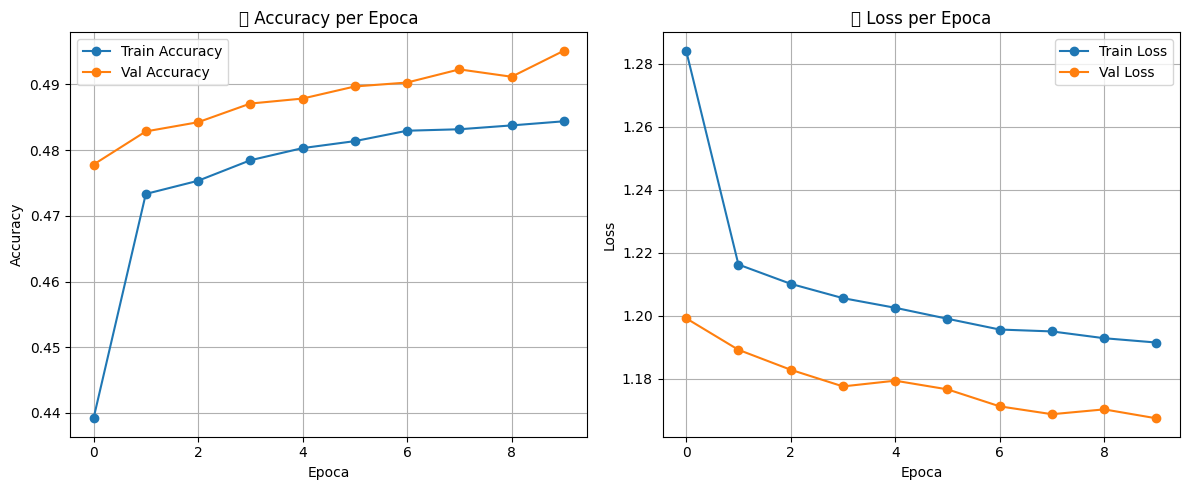

In [8]:
import matplotlib.pyplot as plt

# ✅ 9. Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('📈 Accuracy per Epoca')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ✅ 10. Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('📉 Loss per Epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
